In [176]:
import pandas as pd
import numpy as np

In [360]:
data = pd.read_csv(r"C:\Users\Sarah\Downloads\uber-tlc-foil-response-master\uber-tlc-foil-response-master\uber-trip-data\uber-raw-data-apr14.csv")

In [361]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### Clean the data

In [362]:
data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [363]:
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [364]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [365]:
data['Date/Time']

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764


In [358]:
data['Date/Time'] = data['Date/Time'].apply(lambda x: x.toordinal())

AttributeError: 'int' object has no attribute 'toordinal'

,index,Date/Time,Lat,Lon,Base_B02512,Base_B02598,Base_B02617,Base_B02682,Base_B02764,KMeans6
0,0,735324,40.7690,-73.9549,1,0,0,0,0,3
1,1,735324,40.7267,-74.0345,1,0,0,0,0,0
2,2,735324,40.7316,-73.9873,1,0,0,0,0,0
3,3,735324,40.7588,-73.9776,1,0,0,0,0,3
4,4,735324,40.7594,-73.9722,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
523483,564511,735353,40.7640,-73.9744,0,0,0,0,1,3
523484,564512,735353,40.7629,-73.9672,0,0,0,0,1,3
523485,564513,735353,40.7443,-73.9889,0,0,0,0,1,0
523486,564514,735353,40.6756,-73.9405,0,0,0,0,1,2


In [184]:
data['Base'].value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

In [185]:
data

,Date/Time,Lat,Lon,Base
0,735324,40.7690,-73.9549,B02512
1,735324,40.7267,-74.0345,B02512
2,735324,40.7316,-73.9873,B02512
3,735324,40.7588,-73.9776,B02512
4,735324,40.7594,-73.9722,B02512
...,...,...,...,...
564511,735353,40.7640,-73.9744,B02764
564512,735353,40.7629,-73.9672,B02764
564513,735353,40.7443,-73.9889,B02764
564514,735353,40.6756,-73.9405,B02764


In [186]:
data.to_csv('before_enc.csv')

In [187]:
data= pd.get_dummies(data)

In [188]:
data.dtypes

Date/Time        int64
Lat            float64
Lon            float64
Base_B02512      uint8
Base_B02598      uint8
Base_B02617      uint8
Base_B02682      uint8
Base_B02764      uint8
dtype: object

In [189]:
data.head()

,Date/Time,Lat,Lon,Base_B02512,Base_B02598,Base_B02617,Base_B02682,Base_B02764
0,735324,40.7690,-73.9549,1,0,0,0,0
1,735324,40.7267,-74.0345,1,0,0,0,0
2,735324,40.7316,-73.9873,1,0,0,0,0
3,735324,40.7588,-73.9776,1,0,0,0,0
4,735324,40.7594,-73.9722,1,0,0,0,0


In [190]:
data.duplicated().value_counts()

False    523488
True      41028
dtype: int64

In [191]:
data.drop_duplicates(inplace=True)

<AxesSubplot:>

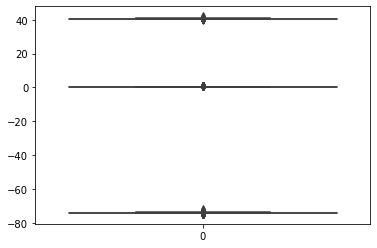

In [192]:
import seaborn as sns
sns.boxplot(data=data['Lat'])
sns.boxplot(data=data['Lon'])
sns.boxplot(data=data['Base_B02512'])


In [193]:
data.to_csv('clean_data.csv')

In [195]:
import matplotlib.pyplot as plt
corr = data.corr()

<AxesSubplot:>

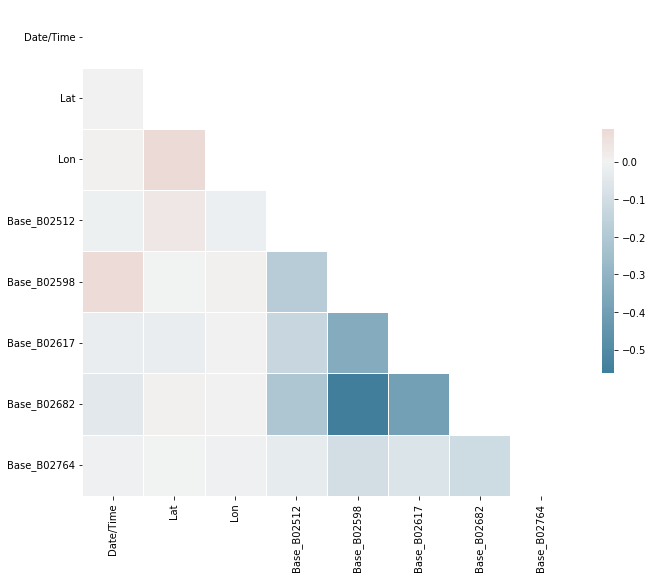

In [196]:
# Your comment here

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## IMPLEMENTING MODELS

In [197]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

### KMEANS

In [198]:
# implement kmeans, HC, DBSCAN
features = data[['Lat','Lon']]
output_dict={}

#Here Kmeans and Hierarchical classifier
for i in range(2,7):
    kmeans = KMeans(n_clusters=i,n_init=6 , max_iter=100)
    kmeans.fit(features)
    key ="kmeans"+str(i)
    output_dict[key] = kmeans.labels_
    
output_dict #output of all three models in one dictionary 

{'kmeans2': array([0, 0, 0, ..., 0, 0, 0]),
 'kmeans3': array([0, 2, 2, ..., 2, 2, 2]),
 'kmeans4': array([2, 0, 0, ..., 0, 0, 0]),
 'kmeans5': array([1, 3, 3, ..., 1, 3, 3]),
 'kmeans6': array([3, 0, 0, ..., 0, 2, 2])}

### ELBOW METHOD


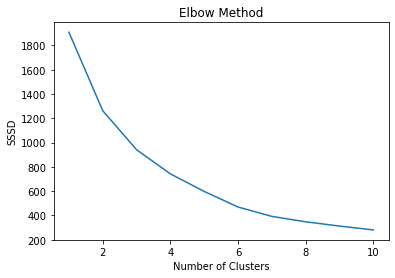

In [199]:
from sklearn.cluster import KMeans
sssd=  []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features)
    sssd.append(kmeans.inertia_)
plt.plot(range(1,11), sssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSSD')
plt.show()


### Create new 'cluster' column and append with values from array 

In [200]:
kmeans6 = KMeans(n_clusters= 6, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans6.fit(features)

KMeans(n_clusters=6, random_state=0)

In [201]:
kmeans6labels = kmeans6.labels_

In [202]:
data['KMeans6']=output_dict['kmeans6']

In [203]:
data['KMeans6'].value_counts()

0    229206
3    204288
2     58272
1     16034
4     11185
5      4503
Name: KMeans6, dtype: int64

In [204]:
data.head()

,Date/Time,Lat,Lon,Base_B02512,Base_B02598,Base_B02617,Base_B02682,Base_B02764,KMeans6
0,735324,40.7690,-73.9549,1,0,0,0,0,3
1,735324,40.7267,-74.0345,1,0,0,0,0,0
2,735324,40.7316,-73.9873,1,0,0,0,0,0
3,735324,40.7588,-73.9776,1,0,0,0,0,3
4,735324,40.7594,-73.9722,1,0,0,0,0,3


In [205]:
X = data[['Lat','Lon']]
y = data['KMeans6']

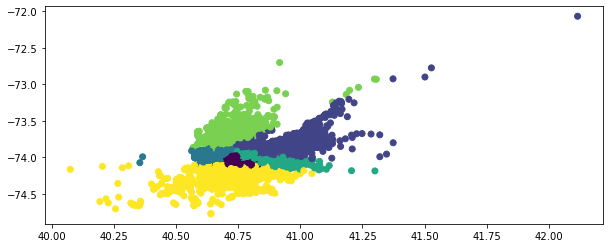

In [206]:
fig = plt.figure(figsize=(10,4))
plot1 = fig.add_subplot(111)   
plot1.scatter(X.Lat,X.Lon, c=data['KMeans6'])
plt.show()


### SILHOUETTE SCORE FOR KMEANS

In [207]:
from sklearn.metrics import silhouette_samples, silhouette_score

using sample_size 100000 to be able to run code as full dataset is too heavy to run 

In [208]:
print('kmeans6')
silhouette_score(X=X, labels=output_dict['kmeans6'], sample_size=100000)

kmeans6


0.46792007940059244

### USING FOLIUM

In [40]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [209]:
import folium

In [325]:
centroids = kmeans6.cluster_centers_
centroids

array([[ 40.76550194, -73.97273608],
       [ 40.6650368 , -73.77220275],
       [ 40.73095844, -73.9985572 ],
       [ 40.70094426, -74.2034682 ],
       [ 40.80457471, -73.87176545],
       [ 40.68836119, -73.96523774]])

In [326]:
tooltip = "Click me!"

for coord in centroids:
    mapit = folium.Map( location=coord )
for i in range(len(centroids)):
    folium.Marker(list(centroids[i]), popup="Cluster centroids", tooltip=tooltip).add_to(mapit)
mapit

### DBSCAN

In [343]:
data_sample = data.sample(frac =.1)

In [213]:
cl=[]
eps_d=[]
db_dict={}

eps=[1.8]
min_samples=[50]
db = DBSCAN(eps=eps[0]/100, min_samples=min_samples[0],n_jobs=-1).fit(data_sample[['Lat','Lon']])
key2="db"+str(eps[0])+str(min_samples[0])
db_dict[key2] = db.labels_
cl = len(np.unique(db.labels_))
eps_d.append([eps[0]/100,min_samples,cl])



assigning db_labels to new column in dataframe

In [214]:
data_sample['db_clusters'] = db.labels_

In [215]:
data_sample

,Date/Time,Lat,Lon,Base_B02512,Base_B02598,Base_B02617,Base_B02682,Base_B02764,KMeans6,db_clusters
426642,735336,40.7634,-73.9592,0,0,0,1,0,3,0
188955,735350,40.7216,-73.9954,0,1,0,0,0,0,0
527214,735351,40.7514,-73.9937,0,0,0,1,0,0,0
252270,735332,40.7522,-73.9768,0,0,1,0,0,3,0
159484,735347,40.7209,-74.0051,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
293646,735345,40.7163,-74.0152,0,0,1,0,0,0,0
227670,735326,40.7386,-73.9938,0,0,1,0,0,0,0
536928,735352,40.7842,-73.9570,0,0,0,1,0,3,0
84578,735333,40.7101,-74.0105,0,1,0,0,0,0,0


In [216]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_mutual_info_score, completeness_score, homogeneity_score, adjusted_rand_score, fowlkes_mallows_score
def Silhouette_Coefficient(X, y_pred):
    print("Silhouette Coefficient is equal to:")
    print(silhouette_score(X,y_pred))


In [217]:
for key in db_dict:
    print(key)
    Silhouette_Coefficient(X=data_sample[['Lat','Lon']], y_pred=db_dict[key])


db1.850
Silhouette Coefficient is equal to:
0.7447695095881826


In [ ]:
db_final = DBSCAN(eps=1.8, min_samples=50,n_jobs=-1).fit(data_sample[['Lat','Lon']])


Plotting db scan clusters

In [121]:
Xdb = data_sample[['Lat','Lon']]
ydb = data_sample['db_clusters']

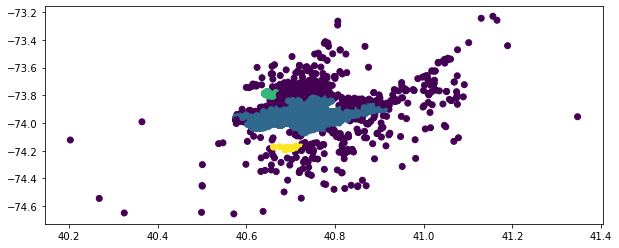

In [122]:
fig = plt.figure(figsize=(10,4))
plot1 = fig.add_subplot(111)   
plot1.scatter(Xdb.Lat,Xdb.Lon, c=ydb)
plt.show()

 ### FOLIUM MAP

In [276]:
clusts= data_sample.groupby(['db_clusters'], as_index=False)[['Lat','Lon']].agg(['mean','count'])
clusts.reset_index(inplace=True)
clusts['radius']= ''
clusts['radius']=round(clusts['Lon','count']/sum(clusts['Lon','count'])*100,0)
clusts

db_clusters        Lat               Lon        radius
                    mean  count       mean  count       
0          -1  40.763453    720 -73.905402    720    1.0
1           0  40.741708  50484 -73.980863  50484   96.0
2           1  40.645976    838 -73.784658    838    2.0
3           2  40.691927    307 -74.179629    307    1.0

In [250]:
clusts.at[2,('Lat','count')]

838

In [303]:
m = folium.Map(location=[clusts.at[0,('Lat','mean')],clusts.at[0,('Lon','mean')]],)

folium.Marker(location=[clusts.at[0,('Lat','mean')],clusts.at[0,('Lon','mean')]],tooltip='Brooklyn', popup ='Cluster -1: count 720').add_to(m)
folium.CircleMarker(location=[clusts.at[0,('Lat','mean')],clusts.at[0,('Lon','mean')]],radius=20, fill_color='orange').add_to(m)

folium.Marker(location=[clusts.at[1,('Lat','mean')],clusts.at[1,('Lon','mean')]], tooltip='Manhattan', popup ='Cluster 0: count 50484').add_to(m)
folium.CircleMarker(location=[clusts.at[1,('Lat','mean')],clusts.at[1,('Lon','mean')]],radius=40, fill_color='red').add_to(m)

folium.Marker(location=[clusts.at[2,('Lat','mean')],clusts.at[2,('Lon','mean')]],tooltip='JFK Airport', popup ='Cluster 1: count 838').add_to(m)
folium.CircleMarker(location=[clusts.at[2,('Lat','mean')],clusts.at[2,('Lon','mean')]],radius=20, fill_color='orange').add_to(m)

folium.Marker(location=[clusts.at[3,('Lat','mean')],clusts.at[3,('Lon','mean')]],tooltip='Newark Airport', popup ='Cluster 2: count 307').add_to(m)
folium.CircleMarker(location=[clusts.at[3,('Lat','mean')],clusts.at[3,('Lon','mean')]],radius=10, fill_color='purple').add_to(m)

m

In [327]:
data_sample.to_csv('final_data.csv')

In [329]:
data_sample.drop(['index'],axis=1, inplace=True)

In [366]:
import datetime as dt
data_sample3 = data_sample
data_sample3['Date/Time'] = data['Date/Time']

In [370]:
data_sample3['db_clusters'] = db.labels_

In [371]:
data_sample3.to_csv('final_data.csv')

In [372]:
data_sample3

,Date/Time,Lat,Lon,Base_B02512,Base_B02598,Base_B02617,Base_B02682,Base_B02764,KMeans6,db_clusters
190326,2014-04-27 20:10:00,40.7630,-73.9729,0,1,0,0,0,3,0
322292,2014-04-30 13:01:00,40.7235,-74.0077,0,0,0,1,0,0,0
141872,2014-04-21 10:48:00,40.7863,-73.9519,0,1,0,0,0,3,0
98785,2014-04-12 23:47:00,40.7058,-74.0097,0,1,0,0,0,0,0
402242,2014-04-10 16:00:00,40.7807,-73.9563,0,0,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...
362558,2014-04-05 07:43:00,40.6058,-73.9694,0,0,0,1,0,2,0
502667,2014-04-24 23:04:00,40.7270,-74.0002,0,0,0,1,0,0,0
274217,2014-04-16 13:57:00,40.7416,-74.0008,0,0,1,0,0,0,0
197783,2014-04-29 07:41:00,40.7252,-73.8445,0,1,0,0,0,1,0


### HIERARCHICAL CLASSIFIER

In [307]:
data_sample2 = data.sample(frac =.05)

In [323]:
hc_dict={}

for i in range(2,11):
    hc = AgglomerativeClustering(n_clusters=i)
    hc.fit_predict(data_sample2[['Lat','Lon']])
    key ="hc"+str(i)
    hc_dict[key] = hc.labels_
    

documentation to do dendrogram : https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [316]:
from scipy.cluster import hierarchy
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    hierarchy.dendrogram(linkage_matrix, **kwargs)

In [317]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data_sample2[['Lat','Lon']])

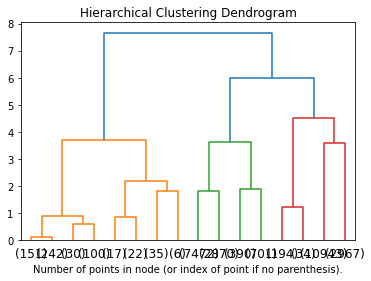

In [318]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# According to the Dendrogram, we could chose 7 clusters 

In [324]:
def metrics_testing (X,  y_pred):

    silhouette = silhouette_score(X, y_pred)
    print('silhouette_score is', silhouette)
    
    variance_ratio = calinski_harabasz_score(X, y_pred)
    print('variance ratio is', variance_ratio)
    
for key in hc_dict:
    print('\n',key)
    metrics_testing(X=data_sample2, y_pred=hc_dict[key])


 hc2
silhouette_score is 0.003632324534001825
variance ratio is 1.8799484963609832

 hc3
silhouette_score is -0.014305091722274106
variance ratio is 2.6259196045006417

 hc4
silhouette_score is -0.0271054761944673
variance ratio is 2.320419698304149

 hc5
silhouette_score is -0.029378893373077326
variance ratio is 1.7426809425826542

 hc6
silhouette_score is -0.029536597666327494
variance ratio is 1.4110168059501653

 hc7
silhouette_score is -0.034587637864021935
variance ratio is 1.26223518960197

 hc8
silhouette_score is -0.04392502096041364
variance ratio is 1.1433892079953796

 hc9
silhouette_score is -0.0439482833599862
variance ratio is 1.0039249835886621

 hc10
silhouette_score is -0.11015283118145924
variance ratio is 0.9246992801024285
